Using the UCI Mushroom dataset, use k-means and a suitable cluster evaluation metric to determine the optimal number of clusters in the dataset. Note that this may not necessarily be two (edible versus not-edible).

In [7]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
from sklearn import metrics
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import numpy as np

In [31]:
data = pd.read_csv('./agaricus-lepiota.csv')
data.pop('edibility')
dummies = pd.get_dummies(data)
dummies.head()

,cap-shape_b,cap-shape_c,cap-shape_f,cap-shape_k,cap-shape_s,cap-shape_x,cap-surface_f,cap-surface_g,cap-surface_s,cap-surface_y,...,population_s,population_v,population_y,habitat_d,habitat_g,habitat_l,habitat_m,habitat_p,habitat_u,habitat_w
0,0,0,0,0,0,1,0,0,1,0,...,1,0,0,0,0,0,0,0,1,0
1,0,0,0,0,0,1,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0
2,1,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0
3,0,0,0,0,0,1,0,0,0,1,...,1,0,0,0,0,0,0,0,1,0
4,0,0,0,0,0,1,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0


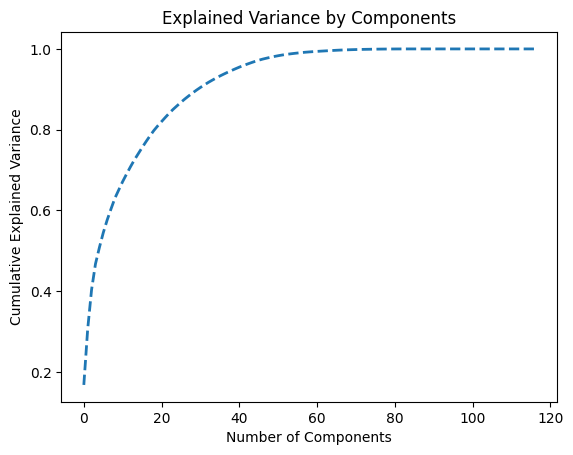

In [27]:
pca = PCA()
pca.fit(dummies)
amount = len(pca.explained_variance_ )
plt.figure()
plt.plot(range(0, amount), pca.explained_variance_ratio_.cumsum(), linestyle='--', linewidth=2)
plt.title('Explained Variance by Components')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.show()

Plot this metric while increasing the number of clusters, e.g., $k=2..30 $

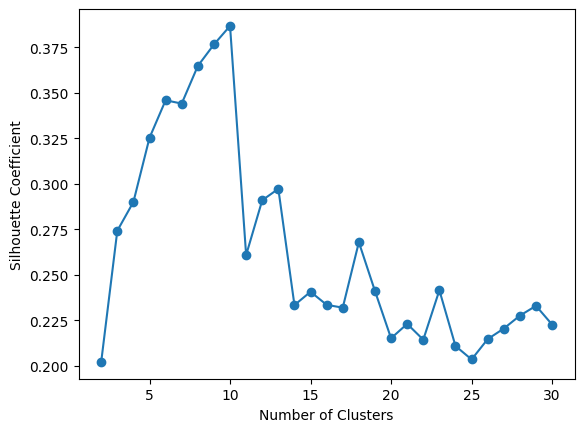

In [17]:
pca = PCA(n_components=20)
df_pca = pca.fit_transform(dummies)
sc = []
steps = []
for i in range(2, 31):
    kmeans_pca = KMeans(n_clusters=i, init = 'k-means++')
    kmeans_pca.fit(df_pca)
    sc.append(metrics.silhouette_score(df_pca, kmeans_pca.labels_, metric='euclidean'))
    steps.append(i)
plt.figure()
plt.plot(range(2,31), sc, marker="o")
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Coefficient')
plt.show()

10


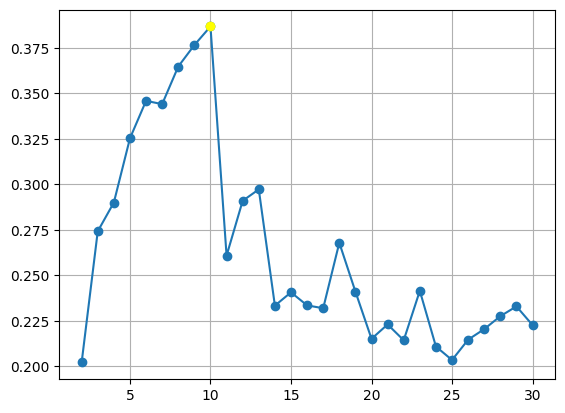

In [19]:
np.array(sc)
argmax = np.argmax(sc)
plt.plot(steps, sc, marker="o")
plt.plot(steps[argmax], sc[argmax], marker="o", c="yellow")
plt.grid()
print(argmax + 2)

Visualise the data using the number of clusters and a suitable projection or low-dimensional embedding.

In [28]:
n = 5
sc = np.array(sc)
idx = np.argpartition(sc, -n)[-n:]
indices = idx[np.argsort((-sc)[idx])] + 2
print(indices)

[10  9  8  6  7]


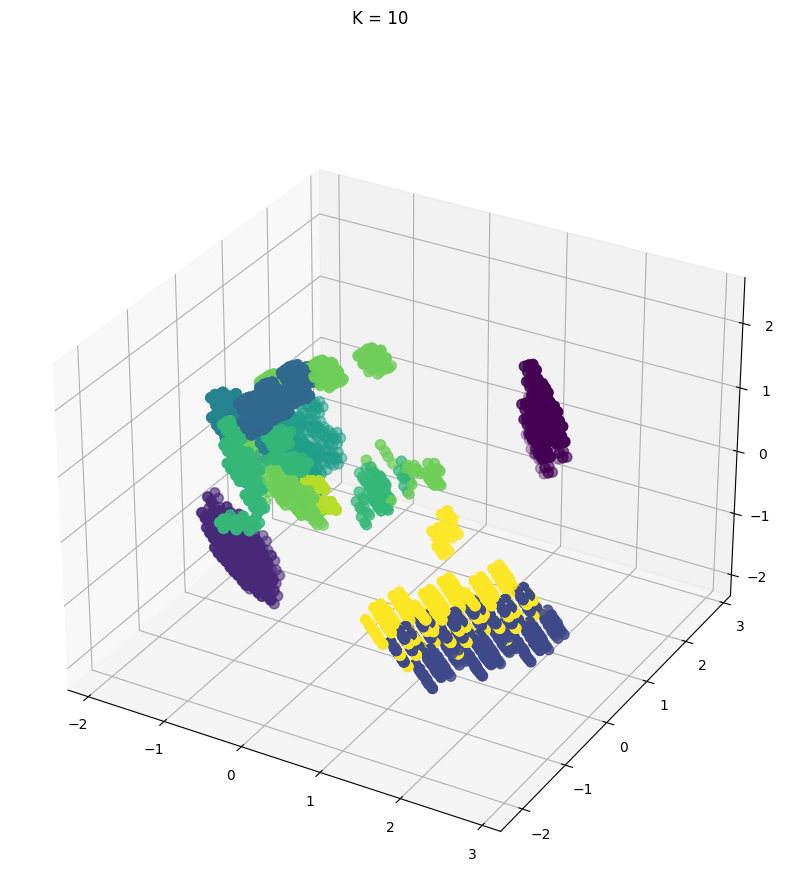

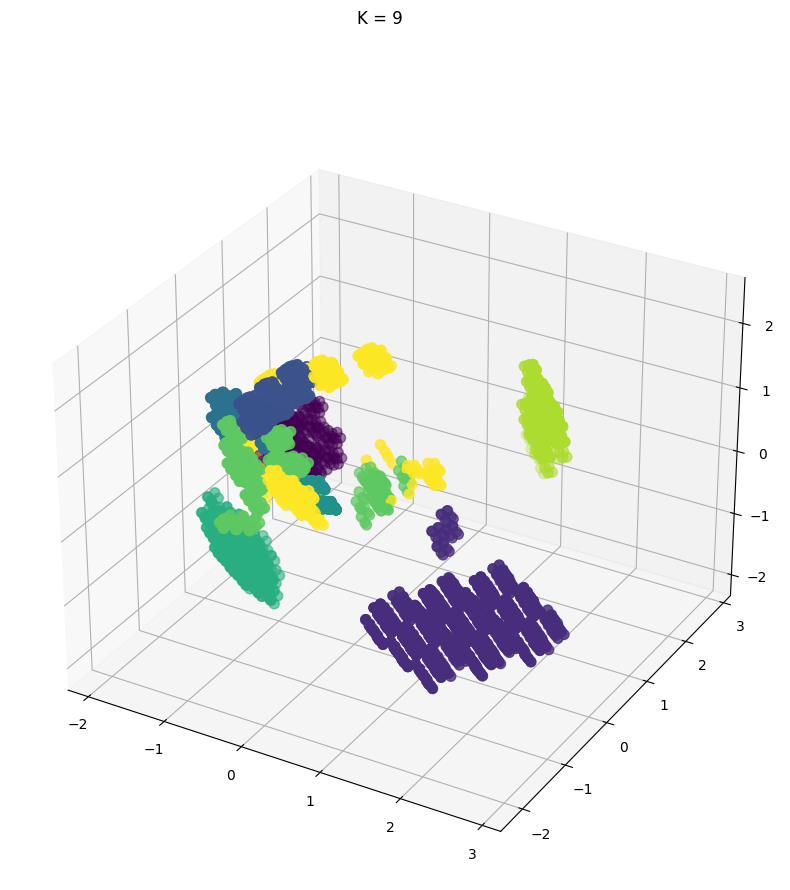

In [32]:
k = indices[0]
labels = KMeans(n_clusters=k).fit_predict(df_pca)
pca = PCA(n_components=3)
x_plot = np.array(pca.fit_transform(dummies))
fig = plt.figure(figsize=(10,10))
fig.suptitle(f"K = {k} ")
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x_plot[:,0], x_plot[:,1], x_plot[:,2], c=labels, s=50, cmap='viridis')

k = indices[1]
labels = KMeans(n_clusters=k).fit_predict(df_pca)
pca = PCA(n_components=3)
x_plot = np.array(pca.fit_transform(dummies))
fig = plt.figure(figsize=(10,10))
fig.suptitle(f"K = {k} ")
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x_plot[:,0], x_plot[:,1], x_plot[:,2], c=labels, s=50, cmap='viridis')